In [1]:
import numpy as np
from scipy.stats import rayleigh
import matplotlib.pyplot as plt

### 1. Построение распределений

Сгенерировать выборку с распределением Рэлэя ( https://ru.wikipedia.org/wiki/Распределение_Рэлея ) используя numpy и scipy и построить на основе ее кривую плотности распределения на основе гистограммы из Matplotlib.

In [2]:
x = np.linspace(rayleigh.ppf(0.01),
                rayleigh.ppf(0.99), 100)

In [3]:
r = rayleigh.rvs(size=1000)

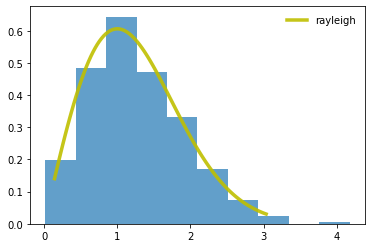

In [4]:
fig, ax = plt.subplots(1, 1)
fig.figsize = (10, 6)
ax.plot(x, rayleigh.pdf(x),
        'y-', lw=3.5, alpha=0.9, label='rayleigh')
ax.hist(r, density=True, alpha=0.7)
ax.legend(frameon=False)
plt.show()

### 2. Построение графика на по функции

Сгенерировать массивы по функции (x^2 + y^2 - 1)^3 - x^2 y^3 = 0 и построить на основе них график.

In [5]:
x=np.arange(-1.139, 1.14, 0.001)
y1=1/2 * (x**2)**(1/3) + np.sqrt((1/4 * (x**4)**(1/3) - (x**2) + 1))
y2=1/2 * (x**2)**(1/3) - np.sqrt((1/4 * (x**4)**(1/3) - (x**2) + 1))

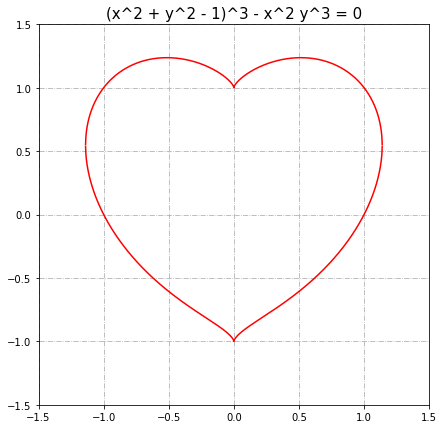

In [6]:
plt.figure(figsize=(7,7))
plt.plot(x, y1, 'r-')
plt.plot(x, y2, 'r-')
plt.title('(x^2 + y^2 - 1)^3 - x^2 y^3 = 0', fontsize=15)
plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))
plt.grid(linestyle='-.')
plt.show()

### 3. Анализ зависимостей

Найти зависимости представленные в датасете приложенном к заданию.

In [7]:
# np.loadtxt('dataset_home.txt', dtype='object')

In [8]:
# np.genfromtxt("dataset_home.txt", delimiter=",", dtype='text')[:1]

In [9]:
# np.array(list('freedom'))

In [10]:
age = []
sex = []
bmi = []
children = []
smoker =[]
region = []
charges = []

In [11]:
with open('dataset_home.txt', 'r') as f:
    for h in f.readlines():
        age.append(int(h.split(',')[0]))
        
        if h.split(',')[1] == 'male':
            sex.append(1)
        else:
            sex.append(0)
        
        bmi.append(float(h.split(',')[2]))
        
        children.append(int(h.split(',')[3]))
        
        if h.split(',')[4] == 'yes':
            smoker.append(1)
        else:
            smoker.append(0)
            
        if h.split(',')[5] == 'northwest':
            region.append(0)
        elif h.split(',')[5] == 'northeast':
            region.append(1)
        elif h.split(',')[5] == 'southwest':    
            region.append(2)
        elif h.split(',')[5] == 'southeast':    
            region.append(3)
        else:
            region.append(h.split(',')[5])
            
        charges.append(float(h.split(',')[6]))

In [12]:
age = np.array(age)
sex = np.array(sex)
bmi = np.array(bmi)
children = np.array(children)
smoker = np.array(smoker)
region = np.array(region)
charges = np.array(charges)

In [13]:
data = {'age':age, 'sex':sex, 'bmi': bmi, 'children':children, 'smoker':smoker, 'region':region, 'charges':charges}

Проверим размерность всех созданных массивов: 

In [14]:
for d in data.values():
    print(d.shape)

(670,)
(670,)
(670,)
(670,)
(670,)
(670,)
(670,)


Получим основные статистики по массивам:

In [15]:
def get_info(array):
    return f'максимальное значение {np.max(array)}, минимальное значение {np.min(array)}, среднее значение {np.mean(array)}, медиана {np.median(array)}'

In [16]:
for d in data:
    print(f"{d}: {get_info(data.get(d))}")    

age: максимальное значение 64, минимальное значение 18, среднее значение 38.37761194029851, медиана 37.0
sex: максимальное значение 1, минимальное значение 0, среднее значение 0.49850746268656715, медиана 0.0
bmi: максимальное значение 53.13, минимальное значение 16.815, среднее значение 30.212865671641794, медиана 29.92
children: максимальное значение 5, минимальное значение 0, среднее значение 1.1059701492537313, медиана 1.0
smoker: максимальное значение 1, минимальное значение 0, среднее значение 0.20597014925373133, медиана 0.0
region: максимальное значение 3, минимальное значение 0, среднее значение 1.483582089552239, медиана 1.0
charges: максимальное значение 62592.87309, минимальное значение 1131.5066, среднее значение 12899.874326014924, медиана 9098.433125


Значимые статистики для массивов age, sex (судя по средней распределение по полам в выборке равномерное), bmi, children, smoker(число курильщиков 20% от выборки) и charges.   
Для массива region полученные данные смысла не имеют, т.к. числовые значения только кодируют тестовые.

Построим гистограммы чтобы посмотреть распределения данных в массивах: 

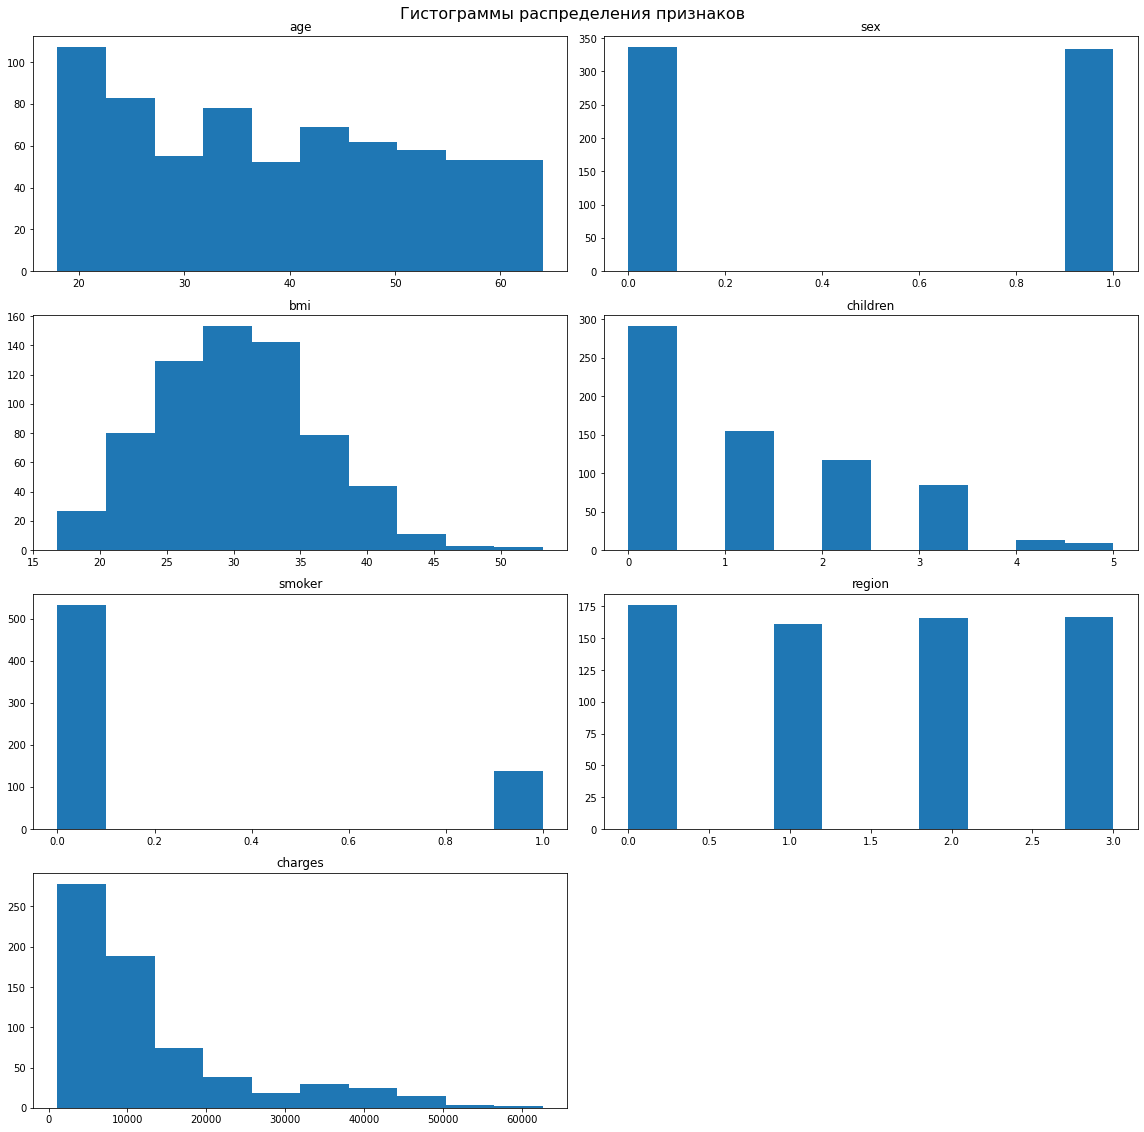

In [17]:
num_c = 2
if len(data) % 2 == 0:
    num_r = len(data) // 2
else:
    num_r = len(data) // 2 + 1

fig, ax = plt.subplots(
    nrows=num_r,
    ncols=num_c,
    figsize=(16, 16),
)
fig.suptitle("Гистограммы распределения признаков", size=16)

for d in (data):
    row = list(data.keys()).index(d) // num_c
    col = list(data.keys()).index(d) % num_c
    plt.axes(ax[row, col])
    plt.hist(data.get(d))
    ax[row, col].set_ylabel("")
    ax[row, col].set_xlabel("")
    ax[row, col].set_title(f"{d}", size=12)
fig.delaxes(ax[3, 1])
plt.tight_layout()

**Вывод**
- наибольшее число участников наблюдения в возрасте до 45 лет, с пиком 18-22 года;  
- распределения по полам в выборке практически равномерны (графически подтвердили наши выводы на основании среднего значения);
- ИМТ распределен нормально, с пиком в районе 30 пунктов. Значения меньше 20 и больше 42 можно считать выбросами;
- у большинства наблюдаемых детей нет, далее количество наблюдаемых уменьшается с увеличением числа детей (1-3 ребенка), также заметны единичные выбросы со значением 4-5 детей. 
- в выборке преобладают некурящие люди, их примерно в 4 раза больше, чем курящих
- распределения по территориям также равномерны
- суммы траты на страховки можно визуально разделить на три группы: пик до 8000 единиц, 8000-12000 единиц и небольшая часть наблюдения свыше 12000.

Целевая переменная исследования - это charges (сумма страховки). Исследуем ее зависимость от остальных переменных.

In [18]:
data2 = {'age':age, 'sex':sex, 'bmi': bmi, 'children':children, 'smoker':smoker, 'region':region}

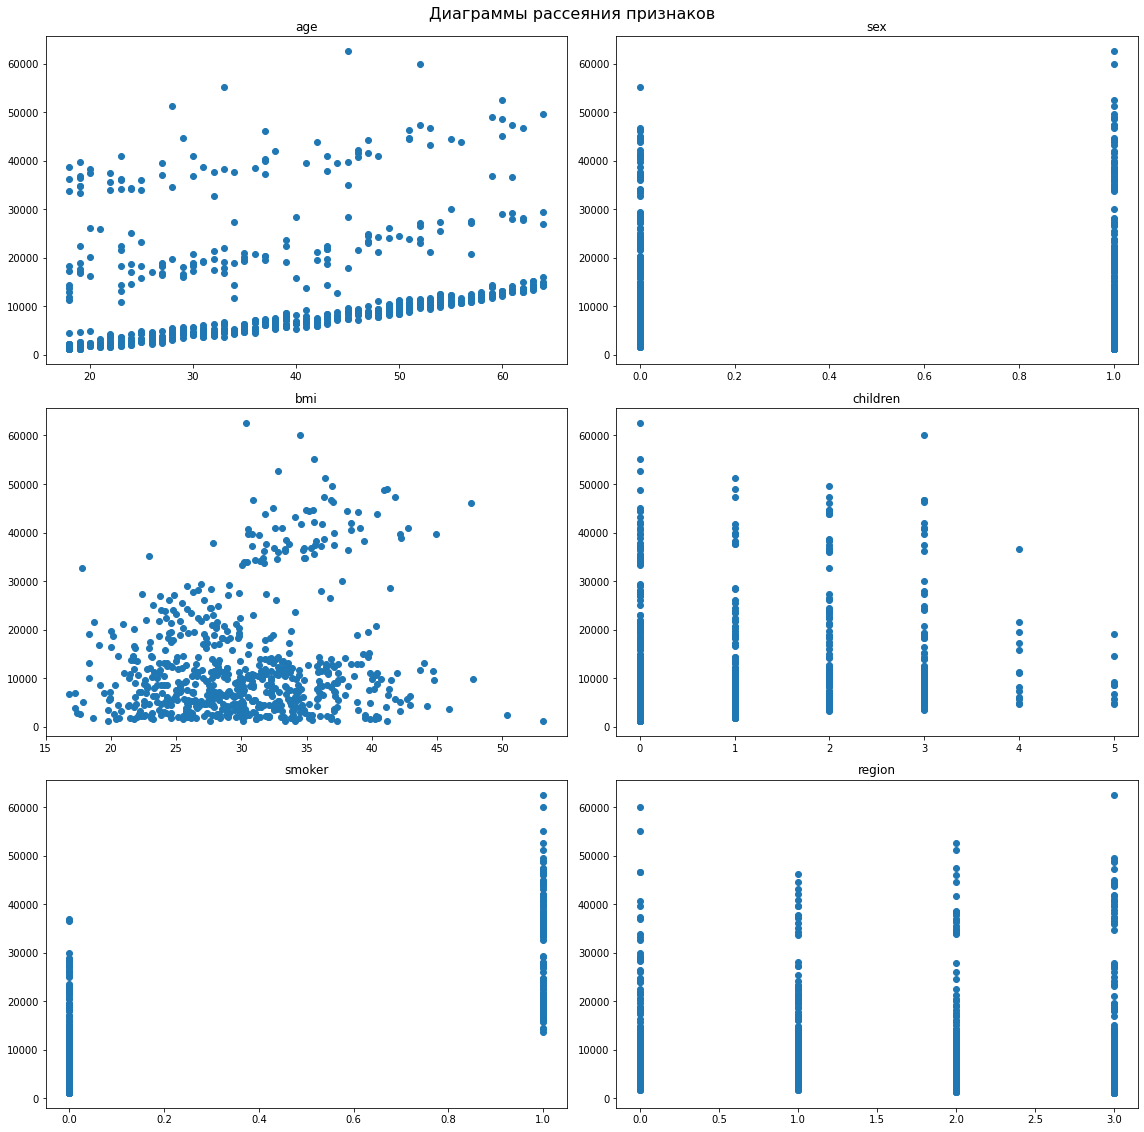

In [19]:
num_c = 2
if len(data2) % 2 == 0:
    num_r = len(data2) // 2
else:
    num_r = len(data2) // 2 + 1

fig, ax = plt.subplots(
    nrows=num_r,
    ncols=num_c,
    figsize=(16, 16),
)
fig.suptitle("Диаграммы рассеяния признаков", size=16)

for d in (data2):
    row = list(data2.keys()).index(d) // num_c
    col = list(data2.keys()).index(d) % num_c
    plt.axes(ax[row, col])
    plt.scatter(data2.get(d), charges)
    ax[row, col].set_ylabel("")
    ax[row, col].set_xlabel("")
    ax[row, col].set_title(f"{d}", size=12)
plt.tight_layout()

**Вывод**
- зависимость возраста и трат на страховку прямая - более высокии расходы у более возрастных людей;  
- распределения по полам - женщины в основном тратят меньше, чем мужчины);
- ИМТ линейная взяимосвязь - чем выше индекс, тем выше траты на страховку, особенно хорошо заметны множественные выбросы по тратам у людей с ИМТ свыше 30;
- количество детей значительного влияния на суммы страховки не оказывают, бездетные тратят даже несколько больше чем родители 1-3 детей. Однако хорошо заметны снижения страховых сумм у родителей 4-5 детей. Можно предположить либо недостаточность данных в выборке, либо необходим более детальный анализ этих групп;
- страховые траты курящих людей выше, чем у некурящих;
- распределения по территориям относительно равномерны, траты жителей северных регионов незачительно ниже южных.

Проанализируем эти же зависисимости, но разобьем пользователй на кластеры по возрасту на 3 группы (моложе 30, от 30 до 50 и старше 50 лет)

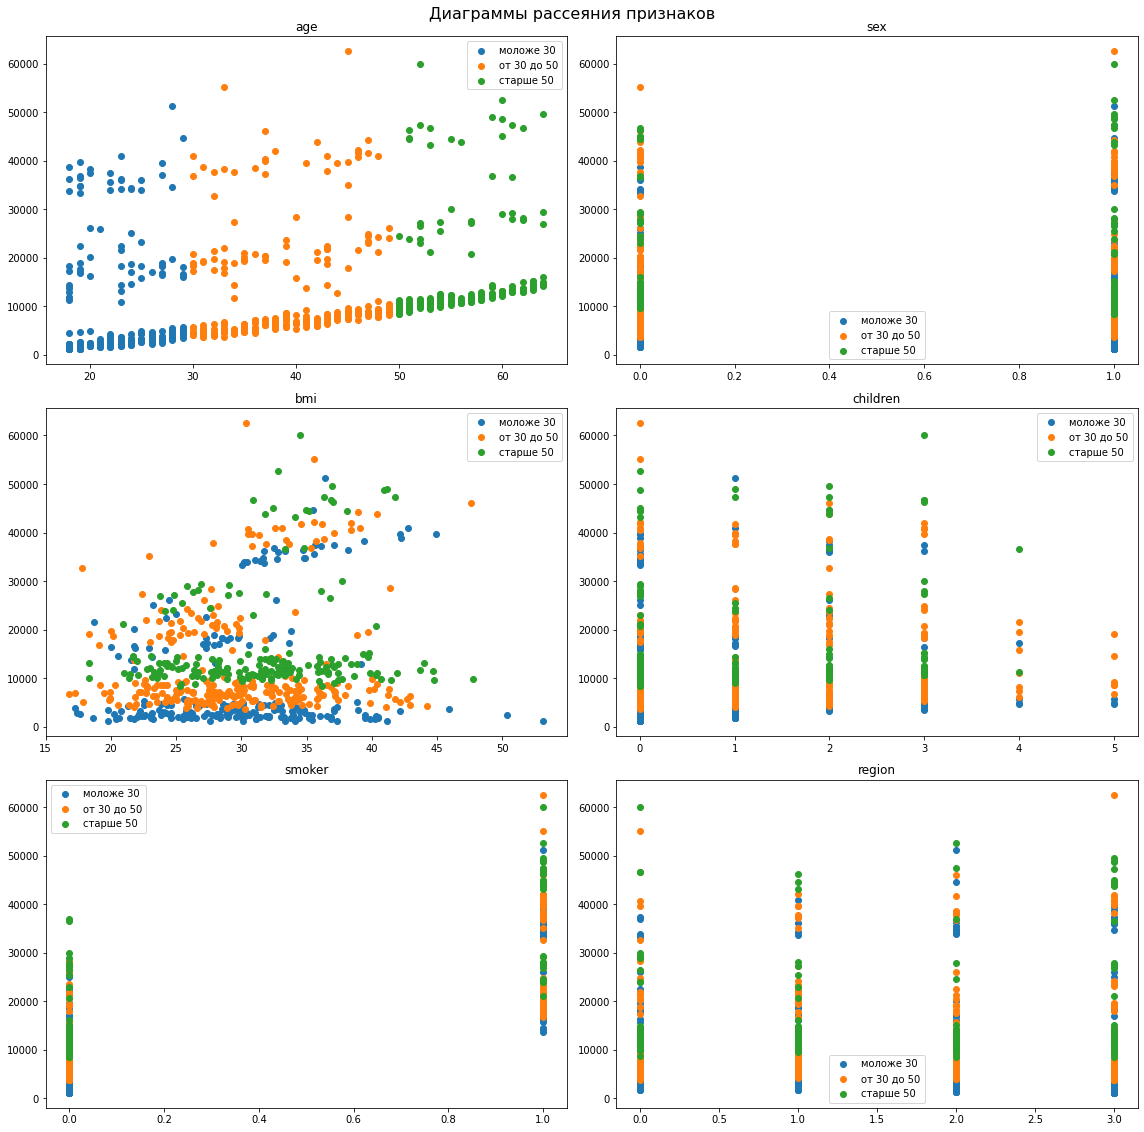

In [20]:
num_c = 2
if len(data2) % 2 == 0:
    num_r = len(data2) // 2
else:
    num_r = len(data2) // 2 + 1

fig, ax = plt.subplots(
    nrows=num_r,
    ncols=num_c,
    figsize=(16, 16),
)
fig.suptitle("Диаграммы рассеяния признаков", size=16)

for d in (data2):
    row = list(data2.keys()).index(d) // num_c
    col = list(data2.keys()).index(d) % num_c
    plt.axes(ax[row, col])
    plt.scatter(data2.get(d)[age < 30], charges[age < 30], label='моложе 30')
    plt.scatter(data2.get(d)[age > 29][age[age > 29] < 50], charges[age > 29][age[age > 29] < 50], label='от 30 до 50')
    plt.scatter(data2.get(d)[age > 49], charges[age > 49], label='старше 50')
    plt.legend()
    ax[row, col].set_ylabel("")
    ax[row, col].set_xlabel("")
    ax[row, col].set_title(f"{d}", size=12)
plt.tight_layout()

**Вывод**
- распределения по полам - мужчины срежней и старшей группы тратят больше чес женщины, а в младшей группе траты примерно одинаковы);
- более возрастные люди(старше 50 лет) по сравнению с молодыми с одинаковым ИМТ тратят больше;
- страховые траты курящих людей страшего возраста, значительно выше чем у некурящих ровестников;